## BeforeIT.jl: a practical demonstration

In [1]:
# import the BeforeIT.jl package as well as plotting packages
using Plots, StatsPlots
import BeforeIT as Bit

In [2]:
# import parameters and initial parameters for the Austrian economy in 2010
# note that these just pre-computed dictionaries with a series of properties, 
# no calibration is happening here

T = 20
parameters = Bit.AUSTRIA2010Q1.parameters;
initial_conditions = Bit.AUSTRIA2010Q1.initial_conditions;

## Essential use of the package

In [3]:
# initialise the model and the data collector
model = Bit.initialise_model(parameters, initial_conditions, T);
data = Bit.initialise_data(model);


In [4]:
# note that the model object is just a container for other agent classes
fieldnames(typeof(model))

(:w_act, :w_inact, :firms, :bank, :cb, :gov, :rotw, :agg, :prop)

In [5]:
# and that each agent type has specific properties, easily accessible
# also note that the attributes are named as in the original paper
fieldnames(typeof(model.w_act))

(:Y_h, :D_h, :K_h, :w_h, :O_h, :C_d_h, :I_d_h, :C_h, :I_h)

In [6]:
# now we can simulate the model for T quarters

for t = 1:T
    println("Epoch: ", t)
    Bit.one_epoch!(model)
    Bit.update_data!(data, model)
end


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20


In [7]:
# note that it takes some more time to run the first epoch because the package is being compiled

In [8]:
# the data that was collected in the "data" object
fieldnames(typeof(data))

(:nominal_gdp, :real_gdp, :nominal_gva, :real_gva, :nominal_household_consumption, :real_household_consumption, :nominal_government_consumption, :real_government_consumption, :nominal_capitalformation, :real_capitalformation, :nominal_fixed_capitalformation, :real_fixed_capitalformation, :nominal_fixed_capitalformation_dwellings, :real_fixed_capitalformation_dwellings, :nominal_exports, :real_exports, :nominal_imports, :real_imports, :operating_surplus, :compensation_employees, :wages, :taxes_production, :gdp_deflator_growth_ea, :real_gdp_ea, :euribor, :nominal_sector_gva, :real_sector_gva)

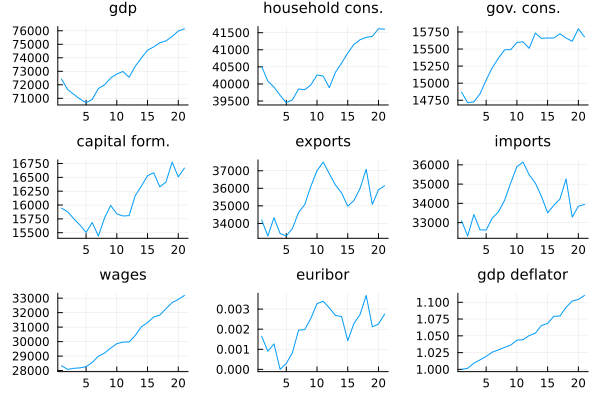

In [9]:
# we can then plot the time series
p1 = plot(data.real_gdp, title = "gdp", titlefont = 10)
p2 = plot(data.real_household_consumption, title = "household cons.", titlefont = 10)
p3 = plot(data.real_government_consumption, title = "gov. cons.", titlefont = 10)
p4 = plot(data.real_capitalformation, title = "capital form.", titlefont = 10)
p5 = plot(data.real_exports, title = "exports", titlefont = 10)
p6 = plot(data.real_imports, title = "imports", titlefont = 10)
p7 = plot(data.wages, title = "wages", titlefont = 10)
p8 = plot(data.euribor, title = "euribor", titlefont = 10)
p9 = plot(data.nominal_gdp ./ data.real_gdp, title = "gdp deflator", titlefont = 10)

plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout = (3, 3), legend = false)

## Collect statistics after a shock by running simulations in parallel

In [10]:
# check the number of threads
Threads.nthreads()

4

In [11]:
# we initialise the model again with the same parameters and initial conditions
model = Bit.initialise_model(parameters, initial_conditions, T);

In [12]:
# we run a "base" simulation, 8 times with a built in function
data_base = Bit.run_n_sims(model, 8);

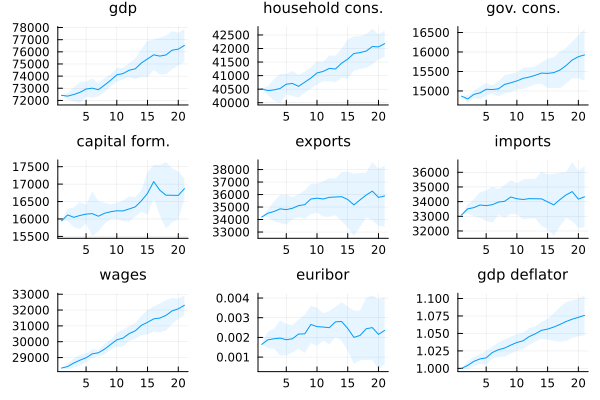

In [13]:
p1 = errorline(1:(T+1), data_base.real_gdp, title = "gdp", titlefont = 10)
p2 = errorline(1:(T+1), data_base.real_household_consumption, title = "household cons.", titlefont = 10)
p3 = errorline(1:(T+1), data_base.real_government_consumption, title = "gov. cons.", titlefont = 10)
p4 = errorline(1:(T+1), data_base.real_capitalformation, title = "capital form.", titlefont = 10)
p5 = errorline(1:(T+1), data_base.real_exports, title = "exports", titlefont = 10)
p6 = errorline(1:(T+1), data_base.real_imports, title = "imports", titlefont = 10)
p7 = errorline(1:(T+1), data_base.wages, title = "wages", titlefont = 10)
p8 = errorline(1:(T+1), data_base.euribor, title = "euribor", titlefont = 10)
p9 = errorline(1:(T+1), data_base.nominal_gdp ./ data_base.real_gdp, title = "gdp deflator", titlefont = 10)

plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout = (3, 3), legend = false)

In [14]:
# define an interest rate shock
shock = Bit.InterestRateShock(0.0, 5)

BeforeIT.InterestRateShock(0.0, 5)

In [15]:
# note, the shock is just an object with a target rate applied for a number of epochs
println(shock.rate)
println(shock.final_time)

0.0
5


In [16]:
# simulate the model with the shock
model = Bit.initialise_model(parameters, initial_conditions, T);
data_shocked = Bit.run_n_sims(model, 8; shock);

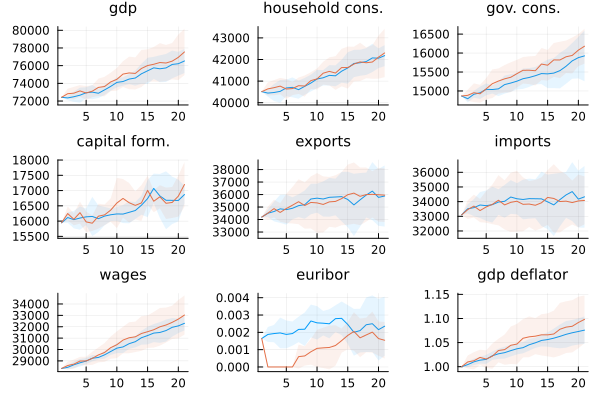

In [17]:
# plot the time series, base and shocked
p1 = errorline(1:(T+1), data_base.real_gdp, title = "gdp", titlefont = 10)
errorline!(1:(T+1), data_shocked.real_gdp, titlefont = 10)
p2 = errorline(1:(T+1), data_base.real_household_consumption, title = "household cons.", titlefont = 10)
errorline!(1:(T+1), data_shocked.real_household_consumption, titlefont = 10)
p3 = errorline(1:(T+1), data_base.real_government_consumption, title = "gov. cons.", titlefont = 10)
errorline!(1:(T+1), data_shocked.real_government_consumption, titlefont = 10)
p4 = errorline(1:(T+1), data_base.real_capitalformation, title = "capital form.", titlefont = 10)
errorline!(1:(T+1), data_shocked.real_capitalformation, titlefont = 10)
p5 = errorline(1:(T+1), data_base.real_exports, title = "exports", titlefont = 10)
errorline!(1:(T+1), data_shocked.real_exports, titlefont = 10)
p6 = errorline(1:(T+1), data_base.real_imports, title = "imports", titlefont = 10)
errorline!(1:(T+1), data_shocked.real_imports, titlefont = 10)
p7 = errorline(1:(T+1), data_base.wages, title = "wages", titlefont = 10)
errorline!(1:(T+1), data_shocked.wages, titlefont = 10)
p8 = errorline(1:(T+1), data_base.euribor, title = "euribor", titlefont = 10)
errorline!(1:(T+1), data_shocked.euribor, titlefont = 10)
p9 = errorline(1:(T+1), data_base.nominal_gdp ./ data_base.real_gdp, title = "gdp deflator", titlefont = 10)
errorline!(1:(T+1), data_shocked.nominal_gdp ./ data_base.real_gdp , titlefont = 10)

plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout = (3, 3), legend = false)

## Easily extend the package

In [18]:
# change the expectations, making them backward looking
import BeforeIT: estimate_next_value


In [19]:
estimate_next_value([1.0, 2.0, 3.0, 4.0])

5.000000000000001

In [20]:
function estimate_next_value(data)
    return data[end]
end

estimate_next_value (generic function with 2 methods)

In [21]:
estimate_next_value([1.0, 2.0, 3.0, 4.0])

4.0

In [22]:
model = Bit.initialise_model(parameters, initial_conditions, T);
data_back = Bit.run_n_sims(model, 8);

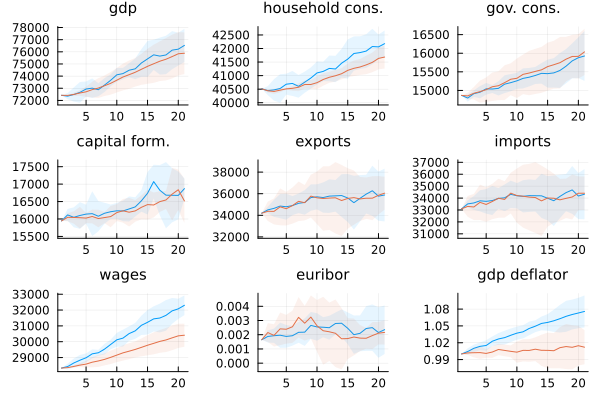

In [23]:
# plot the time series, base and shocked
p1 = errorline(1:(T+1), data_base.real_gdp, title = "gdp", titlefont = 10)
errorline!(1:(T+1), data_back.real_gdp, titlefont = 10)
p2 = errorline(1:(T+1), data_base.real_household_consumption, title = "household cons.", titlefont = 10)
errorline!(1:(T+1), data_back.real_household_consumption, titlefont = 10)
p3 = errorline(1:(T+1), data_base.real_government_consumption, title = "gov. cons.", titlefont = 10)
errorline!(1:(T+1), data_back.real_government_consumption, titlefont = 10)
p4 = errorline(1:(T+1), data_base.real_capitalformation, title = "capital form.", titlefont = 10)
errorline!(1:(T+1), data_back.real_capitalformation, titlefont = 10)
p5 = errorline(1:(T+1), data_base.real_exports, title = "exports", titlefont = 10)
errorline!(1:(T+1), data_back.real_exports, titlefont = 10)
p6 = errorline(1:(T+1), data_base.real_imports, title = "imports", titlefont = 10)
errorline!(1:(T+1), data_back.real_imports, titlefont = 10)
p7 = errorline(1:(T+1), data_base.wages, title = "wages", titlefont = 10)
errorline!(1:(T+1), data_back.wages, titlefont = 10)
p8 = errorline(1:(T+1), data_base.euribor, title = "euribor", titlefont = 10)
errorline!(1:(T+1), data_back.euribor, titlefont = 10)
p9 = errorline(1:(T+1), data_base.nominal_gdp ./ data_base.real_gdp, title = "gdp deflator", titlefont = 10)
errorline!(1:(T+1), data_back.nominal_gdp ./ data_base.real_gdp , titlefont = 10)

plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout = (3, 3), legend = false)